In [1]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 점수 데이터는 원점수가 아닌 표준점수로 생성합니다.
# np.random.normal 모듈에서 평균, 표준편차, 데이터갯수를 파라미터로 사용하여 표준정규분포의 모양을 가진 데이터를 생성합니다.
# 원점수의 표준점수를 구하는 공식은 (원점수 - 평균) / 표준편차 입니다.
# 표준점수에 해당하는 백분율을 표준정규분포표에서 찾으면 됩니다. 이 백분율으로 대략적인 등수도 알 수 있습니다.
# np.clip(int(np.random.normal(loc=50, scale=10)),0,100) 이걸로 0점에서 100점 사이의 범위를 설정할 수 있습니다.
# 1학년 데이터를 만들어 봅시다.
grade = 1
math = np.random.normal(60,15,100)
eng = np.random.normal(70,10,100)
kor = np.random.normal(80,5,100)
# np.set_printoptions(precision=0, suppress=True) 는 nparray형식에서 실수로 표현하는 방법입니다.
first_grade_data = {'Grade' : grade, 'Math' : math, 'English' : eng, 'Korean' : kor}
first_grade_df = pd.DataFrame(first_grade_data)
print(round(first_grade_df))

# 2학년 데이터를 만들어 봅시다.
grade = 2
math = np.random.normal(50,15,100)
eng = np.random.normal(60,10,100)
kor = np.random.normal(70,10,100)
second_grade_data = {'Grade' : grade, 'Math' : math, 'English' : eng, 'Korean' : kor}
second_grade_df = pd.DataFrame(second_grade_data)
print(round(second_grade_df))

# 3학년 데이터를 만들어 봅시다.
grade = 3
math = np.random.normal(40,15,100)
eng = np.random.normal(50,10,100)
kor = np.random.normal(60,10,100)
third_grade_data = {'Grade' : grade, 'Math' : math, 'English' : eng, 'Korean' : kor}
third_grade_df = pd.DataFrame(third_grade_data)
print(round(third_grade_df))

    Grade  Math  English  Korean
0       1  69.0     70.0    69.0
1       1  80.0     72.0    91.0
2       1  35.0     61.0    78.0
3       1  30.0     59.0    69.0
4       1  68.0     62.0    77.0
..    ...   ...      ...     ...
95      1  43.0     70.0    77.0
96      1  73.0     70.0    84.0
97      1  66.0     72.0    78.0
98      1  58.0     74.0    85.0
99      1  72.0     74.0    85.0

[100 rows x 4 columns]
    Grade  Math  English  Korean
0       2  78.0     70.0    56.0
1       2  92.0     69.0    69.0
2       2  76.0     61.0    81.0
3       2  52.0     79.0    70.0
4       2  86.0     63.0    53.0
..    ...   ...      ...     ...
95      2  61.0     50.0    73.0
96      2  43.0     66.0    82.0
97      2  44.0     56.0    90.0
98      2  59.0     55.0    61.0
99      2  21.0     31.0    88.0

[100 rows x 4 columns]
    Grade  Math  English  Korean
0       3  20.0     41.0    53.0
1       3  33.0     60.0    73.0
2       3  52.0     58.0    58.0
3       3  44.0     52.0    

In [3]:
# 1학년부터 3학년까지 모든 데이터를 합쳐봅시다,
df = pd.concat([first_grade_df, second_grade_df, third_grade_df], axis=0)
df.reset_index(drop=True, inplace=True)  # 인덱스 번호 초기화

# 엑셀파일로 저장하기 위해 명령어를 실행할 때 마다 폴더를 생성하도록 설정합니다.
os.makedirs("./", exist_ok=True)  # 이미 폴더가 생성되어있어도 덮어씌우기 합니다.

# 엑셀파일로 저장합시다.
df.to_csv("./student_score.csv")

In [4]:
# 저장한 엑셀파일을 불러와 봅시다.
df = pd.read_csv('./student_score.csv', index_col=0)
print(df)

     Grade       Math    English     Korean
0        1  69.372761  69.898268  68.965022
1        1  80.453145  71.784441  91.152218
2        1  34.720414  61.343532  78.232347
3        1  30.423619  58.698066  68.507051
4        1  68.311449  62.498947  77.052556
..     ...        ...        ...        ...
295      3  42.518891  52.469185  48.021268
296      3  82.395855  29.833137  67.151795
297      3  60.014122  50.973718  59.293970
298      3   3.413068  53.496483  48.932172
299      3  32.366786  62.542713  69.947256

[300 rows x 4 columns]


In [5]:
# 각 컬럼 간 상관관계를 분석해봅시다.
corr_matrix = df.corr()
print(corr_matrix)

            Grade      Math   English    Korean
Grade    1.000000 -0.506671 -0.651283 -0.658216
Math    -0.506671  1.000000  0.374449  0.339141
English -0.651283  0.374449  1.000000  0.420879
Korean  -0.658216  0.339141  0.420879  1.000000


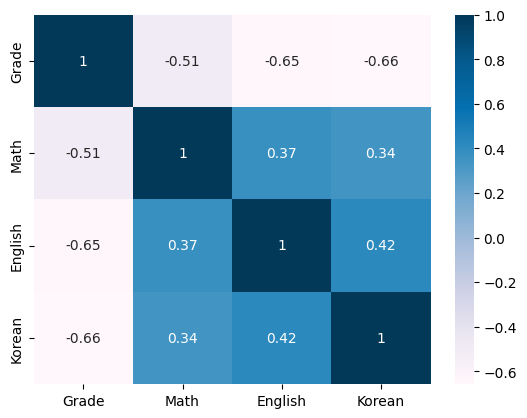

In [6]:
# 상관관계를 히트맵으로 그려 한눈에 파악해봅시다.
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
plt.savefig('heatmap.jpg')  # 시각화를 이미지 파일로 저장해봅시다.
# matplotlib 라이브러리의 이미지 저장 모듈을 쓰려면 plt.show()하기 전에 savefig 모듈을 실행해주어야 합니다.

In [7]:
print(df['Math'].describe())
print(df['English'].describe())
print(df['Korean'].describe())

count    300.000000
mean      51.131674
std       17.554294
min       -0.261355
25%       39.485291
50%       51.516777
75%       64.141180
max       98.614587
Name: Math, dtype: float64
count    300.000000
mean      59.974249
std       12.752423
min       26.673269
25%       51.134002
50%       59.175289
75%       68.893596
max       90.417173
Name: English, dtype: float64
count    300.000000
mean      69.364026
std       12.148919
min       29.062375
25%       60.568234
50%       71.131994
75%       78.470257
max       97.853191
Name: Korean, dtype: float64


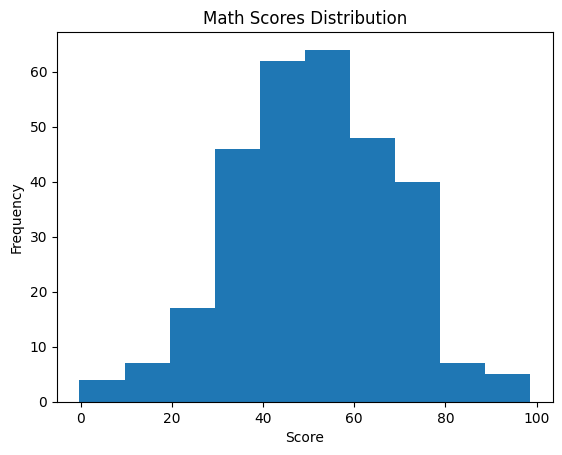

In [8]:
math = df['Math']

plt.hist(math, bins=10)
plt.title('Math Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('math_hist.png')

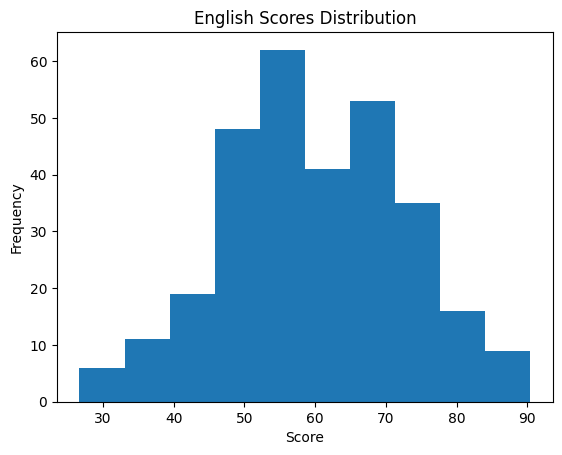

In [9]:
eng = df['English']

plt.hist(eng, bins=10)
plt.title('English Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('eng_hist.png')

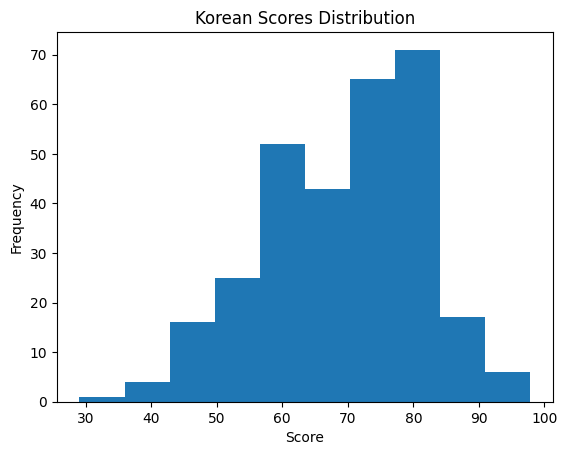

In [10]:
kor = df['Korean']

plt.hist(kor, bins=10)
plt.title('Korean Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('kor_hist.png')

In [11]:
# mean = 50
# std = 10
# score = float(input('원점수를 입력하세요. :'))
# z_score = (score-mean)/std
# print('표준점수는 {} 입니다.'.format(z_score))

원점수를 입력하세요. :60
표준점수는 1.0 입니다.
